# **4.6.1 - "Rotífero ou tardígrado?": Trabalhando com as imagens** 🐛🐻🖼️
**Objetivo**: Implementar uma rede neural convolucional (CNN) utilizando PyTorch ou lightning. Treine esta rede neural em um conjunto de dados de imagens. Explique para o leitor como funciona a camada de convolução de uma CNN  e o motivo de utilizarmos este tipo de arquitetura quando estudamos imagens.

**Dupla**: Júlia Guedes A. dos Santos & Lorena Ribeiro Nascimento
***

### **Introdução** 💡

<p style="text-align:justify;">

O Dataset criado nesse notebook contêm imagens de Tardígrados e Rotíferos, visto que, devido a ética científica, invertebrados vem sendo cada vez mais
utilizados em análises biológicas e ecológicas. Dentre os invertebrados com aplicações biológicas, destaca-se os C. elegans, rotíferos e tardígrados.$^7$

Rotíferos são organismos microscópicos utilizados em análises ecológicas e toxicológicas, por conta da sua sensibilidade físico-química a mudanças do ambiente.$^7$ Já os tardígrados são seres de tamanho entre 3-5 mm, que possuem capacidade criptobiótica mediante estresses ambientais, permitindo alta resistência. Essa capacidade é foco de estudos na área de fármacos e terapias, além de análise ecológicas devido a resposta a mudanças ambientais.$^9$

Todavia a distinção desses organismos em microscópicos óticos é dificultosa, devido a presença de liquens e diversos outros organismos semelhantas,por conta, também, das diferenças entre espécies de rotíferos e de tardígrados, além da posição, transparência e outros aspectos de visualização da imagem.

Assim, nesse notebook pretende-se fazer a leitura do dataset criado a partir das imagens coletadas na internet e do microscópio ótico da Ilum-Escola de Ciência. Ao todo, foram coletadas 39 imagens de tardígrados e 32 de rotíferos, sendo que os conjuntos de teste e validação foram compostos por 10 figuras cada e o restante foi contemplado pelos dados de treino. Essas imagens foram compactadas em um arquivo em formato zip em que estão divididas em pastas de treino, validação e teste. Além disso, como é difícil encontrar imagens desses organismos, buscamos aumentar os dados de treino por meio de técnicas de modificações de imagens, tais como rotações e adição de ruídos.

</p>

### **Importação de bibliotecas** 📚

Em primeiro lugar, precisamos importar as bibliotecas necessárias para a resolução da tarefa proposta, as quais envolvem os processos de importação dos arquivos e plot das imagens.

In [ ]:
# Importação da base de dados
from google.colab import files

# Módulos do matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Bibliotecas para definição de diretório
import zipfile
import os

#Image Augmentation
from skimage import exposure
from skimage.util import random_noise
from skimage import transform
from cv2 import resize
import numpy as np

### **Download dos dados** 🎲

Primeiramente, precisamos importar as imagens. Para isso, por meio da função "files.upload" - própria da biblioteca Colab - iremos importar o zip que contém as imagens coletadas. Após descompactar os arquivos, esses serão contidos no diretório "/content/imagens", sendo que cada pasta contida no zip dará origem a uma nova pasta no diretório.

In [ ]:
# uploaded = files.upload()

In [ ]:
# !unzip Rotiferos-tardigrados.zip

In [ ]:
zip_path = "/content/Rotiferos-tardigrados.zip"  # Caminho para seu zip
extract_path = "/content/imagens"     # Pasta onde os arquivos serão extraídos

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Após baixar os dados, por meio da biblioteca Matplotlib, podemos visualizar as imagens.

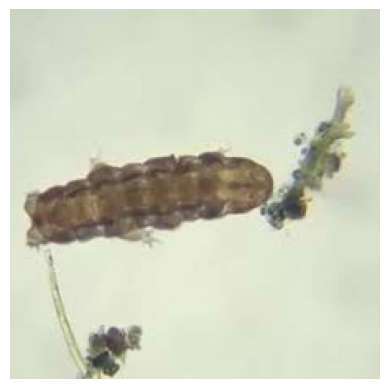

In [ ]:
img_path = os.path.join(extract_path, "Rotiferos-tardigrados/Treino/Tardigrados/imagem12.jpg")
img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

### **Data Augmentation** 🐥➡️🐓

Um dos principais desafios que podem ser enfrentados durante o treinamento de redes neurais é a disponibilidade limitada de dados. Isso, além de tornar o modelo não muito representativo, pode aumentar o risco de *overfitting*.

Para a mitigação desse problema, duas principais estratégias são comumente utilizadas: criação de dados sintéticos e *data augmentation*. Essa segunda técnica consiste na manipulação - através de transformações geométricas ou adição de ruídos, por exemplo - das imagens originais destinadas para o treino da rede neural. A partir disso, é possível deixar a base de dados mais robusta e representativa para o problema abordado. [1]

#### **Transformações geométricas: Rotação vertical e horizontal** 🔄️

De forma simples, transformações geométricas podem ser entendidas como operações aplicadas a uma figura, resultando em outra figura que mantém características geométricas idênticas ou equivalentes à original.

Existem diferentes operações que podem ser consideradas como transformações geométricas, como translação, reflexão e rotação. Essa última, apesar de poder ser realizada a partir da utilização de diferentes centros de rotação, também pode ser feita mediante a rotações nos eixos verticais e horizontal.

Dessa forma, a partir da utilização das funções fliplr e fliprud da biblioetca Numpy, iremos, respectivamente, testar a rotação da imagem utilizada como teste ("imagem12.png" da pasta de treino da classe dos tardigrados) na vertical e horizontal. [2]

**Rotação Vertical**

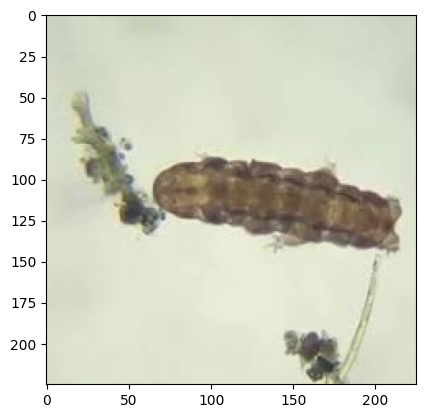

In [ ]:
horiz = np.fliplr(img)
plt.imshow(horiz)

**Rotação Horizontal**

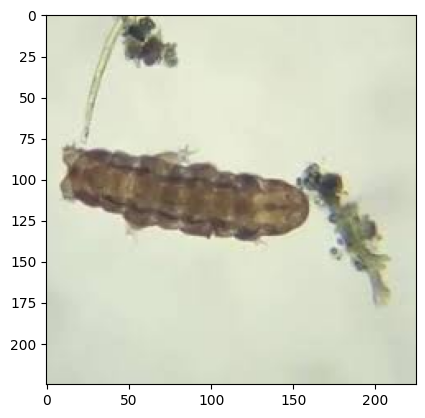

In [ ]:
vert = np.flipud(img)
plt.imshow(vert)

#### **Ruído Gaussiano** 🔔

Como outra forma de induzir a criação de novas imagens, é possível adicionar ruídos às imagens pré-existentes. Dentre um dos mais utilizados, destaca-se o ruído gaussiano, o qual é uma forma de ruído aleatório na qual a função de densidade probabilidade (pdf) segue uma distribuição normal.

No contexto abordado, o ruído gaussiano é particularmente relevante, já que esse tipo de interferência é comumente observado em imagens obtidas por microscopia óptica.

Para a adição do ruído às imagens, a função random_noise, também da biblioteca Numpy, pode ser utilizada, com a especificação do argumento "mode" para "gaussian" (indicativo da aplicação do ruído gaussiano).

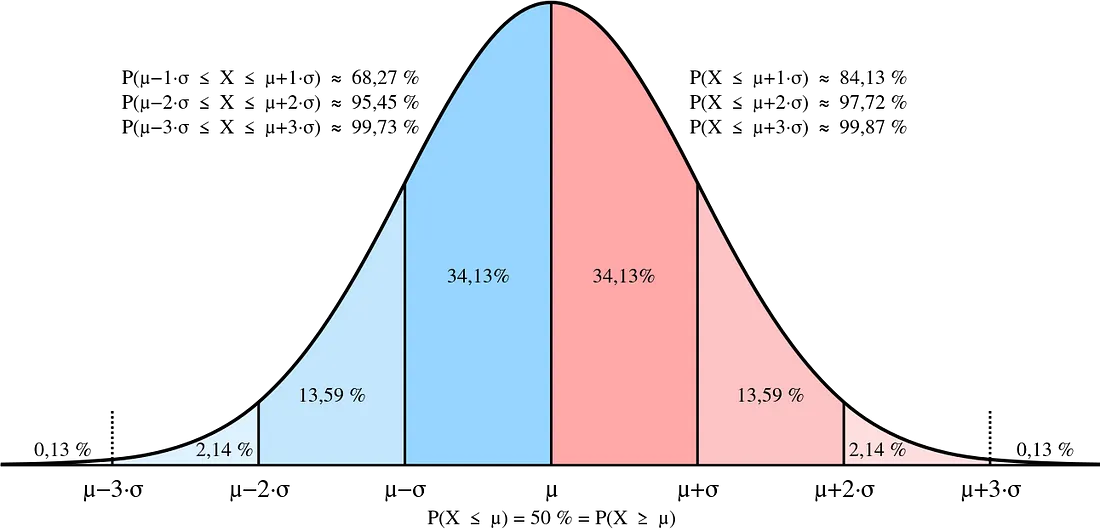

[Figura 1: Distribuição Gaussiana]

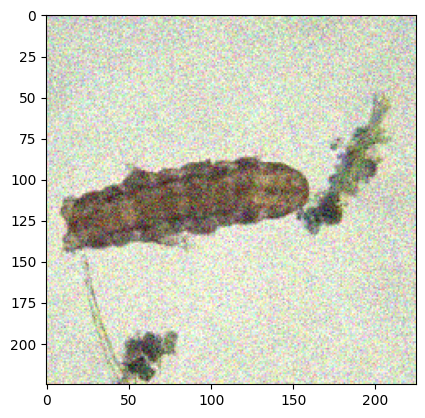

In [ ]:
noise = random_noise(img, mode="gaussian", clip=True)
plt.imshow(noise)

**Manipulação das imagens** 🔔🔄️➡️🖼️

Partindo das técnicas abordadas anteriormente, a função "Augmentation" será definida. Nela, dado um determinado diretório, cada imagem contida ou será rotacionada (verticalmente ou horizontalmente) ou receberá adição de ruído gaussiano, sendo que a escolha dependerá do sorteio realizado por meio da biblioteca Random. Ao final, em ambas as pastas contidas no diretório de treino (referentes as labels Tardigrados e Rotíferos), as imagens serão "duplicadas", com a duplicata sendo indicada pela inserção do nome da operação realizada ao final do título da figura.

In [ ]:
import random
def augmentation(caminho):
  num_imagem = 0
  for i in os.listdir(caminho):
    img_path = os.path.join(f"{caminho}{i}")  # Substitua pelo nome da imagem
    img = mpimg.imread(img_path)
    num_imagem += 1
    sorteio = random.choices(['gauss_noise', 'horizontal','vertical'])   #sorteia o tipo de modificação

    if sorteio == 'gauss_noise':
      noise = random_noise(img, mode="gaussian", clip=True)

    elif sorteio == 'horizontal':
      horiz = np.fliplr(img)

    else:
      vert = np.flipud(img)

    plt.savefig(f"{caminho}{num_imagem}_{sorteio}.png")


In [ ]:
augmentation('Rotiferos-tardigrados/Treino/Tardigrados/') # aplicação da função

<Figure size 640x480 with 0 Axes>

In [ ]:
os.listdir('Rotiferos-tardigrados/Treino/Tardigrados/') # listagem de todos os arquivos contidos no diretório

["8_['gauss_noise'].png",
 "5_['vertical'].png",
 "33_['gauss_noise'].png",
 'imagem15.jpg',
 "19_['vertical'].png",
 'imagem19.jpg',
 "3_['vertical'].png",
 'tardigrado-microscopio.jpg',
 "38_['horizontal'].png",
 "8_['vertical'].png",
 'imagem_complicada.jpg',
 "32_['vertical'].png",
 "10_['vertical'].png",
 "22_['horizontal'].png",
 'Captura de tela 2025-04-12 155222.png',
 "47_['horizontal'].png",
 'imagem7.jpg',
 "7_['gauss_noise'].png",
 "12_['vertical'].png",
 "22_['gauss_noise'].png",
 "45_['vertical'].png",
 "11_['horizontal'].png",
 "21_['vertical'].png",
 'Captura de tela 2025-04-12 155025.png',
 "23_['horizontal'].png",
 'Captura de tela 2025-04-12 155323.png',
 "13_['horizontal'].png",
 'imagem9.jpg',
 "40_['vertical'].png",
 "31_['vertical'].png",
 "35_['vertical'].png",
 "54_['gauss_noise'].png",
 "15_['vertical'].png",
 'imagem16.jpg',
 "33_['horizontal'].png",
 "4_['vertical'].png",
 "39_['gauss_noise'].png",
 "23_['gauss_noise'].png",
 "29_['gauss_noise'].png",
 "26_[

In [ ]:
augmentation('Rotiferos-tardigrados/Treino/Rotiferos/')

<Figure size 640x480 with 0 Axes>

In [ ]:
os.listdir('Rotiferos-tardigrados/Treino/Rotiferos/')

["8_['gauss_noise'].png",
 "3_['vertical'].png",
 'Imagem10.jpg',
 'Imagem3.jpg',
 'Imagem6.jpg',
 'Imagem12.jpg',
 "4_['horizontal'].png",
 'Imagem2.jpg',
 "2_['vertical'].png",
 'Imagem9.jpg',
 'Imagem5.jpg',
 "11_['gauss_noise'].png",
 "6_['vertical'].png",
 'Imagem1.jpg',
 "9_['vertical'].png",
 "10_['gauss_noise'].png",
 "1_['gauss_noise'].png",
 'Imagem8.jpg',
 "7_['vertical'].png",
 "5_['gauss_noise'].png",
 'Imagem4.jpg',
 'Imagem11.jpg',
 'Imagem7.jpg',
 "12_['horizontal'].png"]

### **Conclusão** 😶‍🌫️

Portanto, geramos o dataset desejado com os imagens de tardígrados e rotíferos, que será utilizado para o desenvolvimento da rede neural convolucional. Assim como, aumentou-se os dados obtidos, buscando um melhor desempenho da rede, ou, ao menos, maior volumes de informações para sua empregação.

### **Referências** 🗃️

[1] SCIENCE, ODSC-Open Data. Image Augmentation for Convolutional Neural Networks. Disponível em: <https://odsc.medium.com/image-augmentation-for-convolutional-neural-networks-18319e1291c>. Acesso em: 14 abr. 2025.

[2]Transformações geométricas: translação, rotação e reflexão. Toda Matéria. Disponível em: <https://www.todamateria.com.br/transformacoes-geometricas/>. Acesso em: 14 abr. 2025.

[3] YADAV, Amit. What is Gaussian Noise and Why It’s Useful? Disponível em: <https://medium.com/@amit25173/what-is-gaussian-noise-and-why-its-useful-b3c50dd14628>. Acesso em: 14 abr. 2025.
